<a href="https://colab.research.google.com/github/lmohanakrishnan/TSF_Data-Science-and-Analytics_Intern/blob/main/TSF_Task_1_Prediction_using_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The SparksFoundation- GRIP internship Nov2021**

Task-1-Prediction using supervised ML

**Requirement**

***What will be predicted score if a student studies for 9.25 hrs/day?***

Executed by: Lakshita Mohanakrishnan

#Import necessary libraries for analysis

In [ ]:
#Importing necessary libraries for Analysis
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.externals import joblib
import warnings
warnings.filterwarnings("ignore")

# Read data

In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Check for null values**

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Check for duplicate values**

In [ ]:
rmv_dup=data.duplicated()
print('No. of Duplicates:'+ str(rmv_dup.sum))

No. of Duplicates:<bound method Series.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool>


**Statistics summary**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


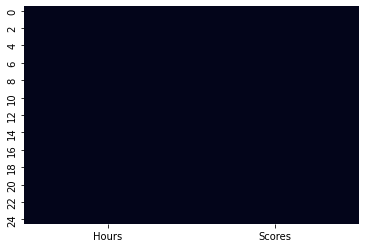

In [ ]:
sns.heatmap(data.isnull(), cbar=False)

**Observations:**
There are no missing values in this dataset.

**Outliers**

Check the outliers in the data by plotting the boxplot

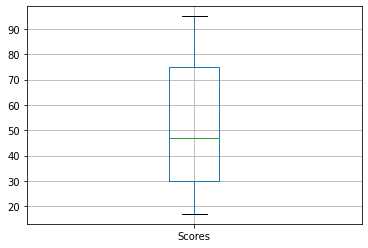

In [ ]:
data.boxplot(['Scores'])

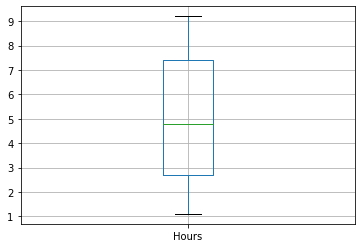

In [ ]:
data.boxplot(['Hours'])

**Observations**

There are no major outliers to be consider

# Visualizing data

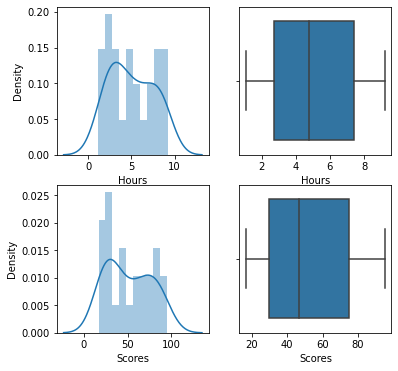

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(6,6)

a=sns.distplot(data['Hours'], bins=10, ax=axes[0][0])
a=sns.boxplot(data['Hours'], orient='v', ax=axes[0][1])

a=sns.distplot(data['Scores'], bins=10, ax=axes[1][0])
a=sns.boxplot(data['Scores'], orient='v', ax=axes[1][1])

plt.show()

**Visualizing Target variable Distribution**

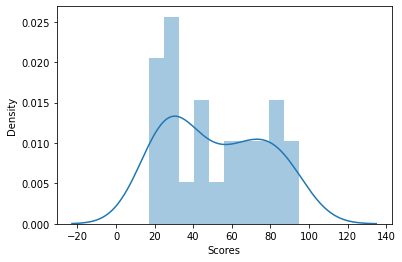

In [ ]:
sns.distplot(data['Scores'], bins=10)
plt.show()

**Observation**

In the above histogram, we can observe that Scores, there it is almost normally distributed with skew in the positive side. 

---

Hence, we can perform a **LINEAR REGRESSION** to predict the values

---



Checking correlation with **Correlation Matrix**

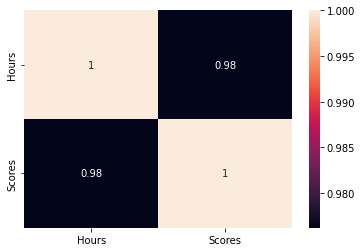

In [ ]:
sns.heatmap(data.corr(),annot=True)

**Observations**

Hours and Scores are highly Positively correlated to each other

**Visualizing Data with Scatter Plots**

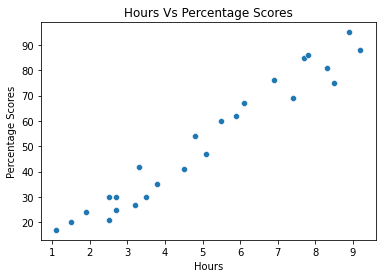

In [ ]:
sns.scatterplot(data['Hours'],data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Hours Vs Percentage Scores')
plt.show()

**Observations**

There is positive linear relationship between the number of hours studied and the scores obtained.

**Linear Regression plot**

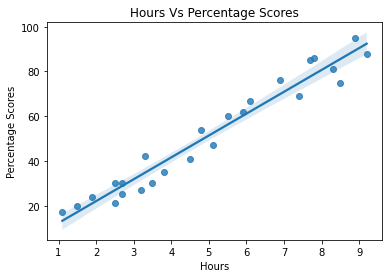

In [ ]:
sns.regplot(data['Hours'],data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Hours Vs Percentage Scores')
plt.show()

**Observation**

From the Scatterplot & Regplot we can clearly see that there is positive relationship between hours & Scores

# ML model

**Preparing the training data for Linear Regression**

Independent variable = Number of hours studied

Dependent variable = Scores obtained

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

**Splitting the dataset for training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


**Model Building** **: Training Linear Regression Model**

In [ ]:
data_reg = LinearRegression()
data_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Training completed")

Training completed


**Predicting Scores**

In [ ]:
y_pred = data_reg.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

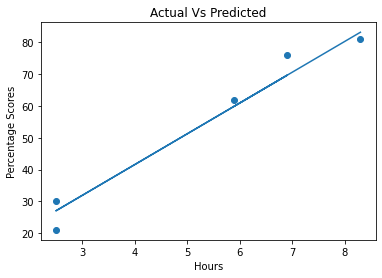

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred)
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Actual Vs Predicted')
plt.show()

**Evaluating Train and Test scores**

In [ ]:
print('Training Score : ', data_reg.score(X_train, y_train))
print('Test Score : ', data_reg.score(X_test, y_test))

Training Score :  0.9491209376364417
Test Score :  0.9678055545167994


**Comparing Actual Score and Predicted Score**

In [ ]:
output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
output.head()

,Actual Score,Predicted Score,Residual
0,81,83.188141,-2.188141
1,30,27.032088,2.967912
2,21,27.032088,-6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


**To visualize the differences between actual scores and predicted scores, a scatter plot is created**

**(a) Training data Scores vs Predicted Scores**

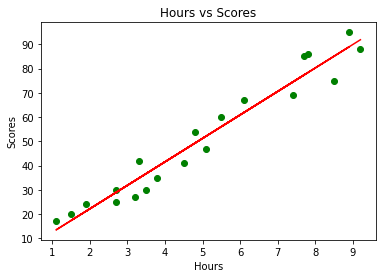

In [ ]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, data_reg.predict(X_train), color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**(b) Testing data Scores vs Predicted Scores**

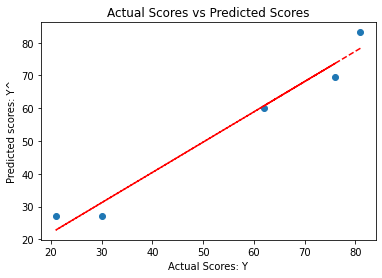

In [ ]:
X=y_test
y=y_pred
plt.scatter(X, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(X, y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.show()

**Model Evaluation (Actual Vs Predicted) on test sample**

Model evaluation using error metrics like :

* Mean_absolute_error

* Mean_squared_error

* R2_score, T-test

* F-Test

**Mean Absolute Error**

In [ ]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  3.9207511902099244


**Root Mean Square Error**

In [ ]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean square error :  4.352380006653288


**Goodness of Fit- R2**

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9678055545167994

**Observations**

Model is performing good in linear model as less MAE and good R-Square value

**T-test**

In [ ]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> 0.03805993508569981
P-value --> 0.9705725131570524


**Observations:**

95% of p-value suggest that the difference between mean of Actual and the Predicted values is close to zero

**F-Test**

In [ ]:
f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.0014485586587276772
P-value --> 0.970572513157049


**Observations:**

F-statistic suggest that the variance of error is random and is in acceptable range with 95% confidance interval

**Summary**

* The output of linear regression at 95% confident level have 1 model variable. The model on train dataset have good R2 value suggest the goodness of fit.This is futher tested on the test sample.

* In test sample R-square ,T-test, F-test were performed to measure the model performance in terms of goodness of fit & randomness of variance between actual and the predicted values.

* In summary ,the model goodness of fit on train sample and performance of model on test sample are in acceptable range. The final model parameters are tabled below

**What will be predicted score if a student study for 9.25 hrs in a day?**

In [ ]:
def ch(x):
        l=lr.predict([[float(x)]])
        print('If student studies for {} hours/day then student will score {}'.format(x,*l))

In [ ]:
ch(9.25)

If student studies for 9.25 hours/day than student will score 92.38611528261494


**Conclusion**

We got predicted the score around 92 based on the study hours i.e., 9.25 hrs/day